In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./data/", one_hot=True)
import matplotlib.pyplot as plt

E:\Anconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
learning_rate = 0.01
num_steps = 30000
batch_size = 256

display_step = 1000
examples_to_show = 10

num_hidden_1 = 256 # 1st layer num features
num_hidden_2 = 128 # 2nd layer num features (the latent dim)
num_input = 784 # MNIST data input (img shape: 28*28)

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([num_input, num_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([num_hidden_2, num_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([num_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'decoder_b2': tf.Variable(tf.random_normal([num_input]))
}
def encoder(x):
    
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                   biases['encoder_b2']))
    return layer_2

def decoder(x):
    
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                   biases['decoder_b2']))
    return layer_2

X = tf.placeholder(shape=[None,num_input],dtype=tf.float32)

encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

y_pred = decoder_op
y_true = X

loss = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)

init = tf.global_variables_initializer()

Step 1: Minibatch Loss: 0.443980
Step 1000: Minibatch Loss: 0.132151
Step 2000: Minibatch Loss: 0.120621
Step 3000: Minibatch Loss: 0.109623
Step 4000: Minibatch Loss: 0.104722
Step 5000: Minibatch Loss: 0.093598
Step 6000: Minibatch Loss: 0.092053
Step 7000: Minibatch Loss: 0.086132
Step 8000: Minibatch Loss: 0.081876
Step 9000: Minibatch Loss: 0.082545
Step 10000: Minibatch Loss: 0.079674
Step 11000: Minibatch Loss: 0.079414
Step 12000: Minibatch Loss: 0.076734
Step 13000: Minibatch Loss: 0.075144
Step 14000: Minibatch Loss: 0.073499
Step 15000: Minibatch Loss: 0.066580
Step 16000: Minibatch Loss: 0.065445
Step 17000: Minibatch Loss: 0.064732
Step 18000: Minibatch Loss: 0.063236
Step 19000: Minibatch Loss: 0.061926
Step 20000: Minibatch Loss: 0.058921
Step 21000: Minibatch Loss: 0.058235
Step 22000: Minibatch Loss: 0.056350
Step 23000: Minibatch Loss: 0.055342
Step 24000: Minibatch Loss: 0.056057
Step 25000: Minibatch Loss: 0.052049
Step 26000: Minibatch Loss: 0.052779
Step 27000: Mi

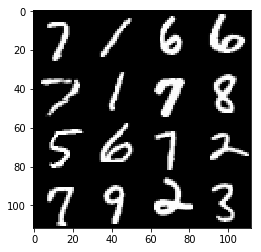

Reconstructed Images


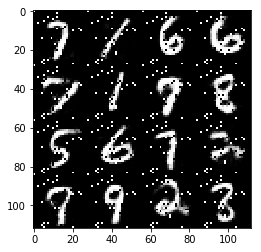

In [4]:
import numpy as np
with tf.Session() as sess:
    sess.run(init)
    for i in range(1, num_steps+1):
        batch_x, _ = mnist.train.next_batch(batch_size)
        _, l = sess.run([optimizer, loss], feed_dict={X: batch_x})
        
        if i % display_step == 0 or i == 1:
            print('Step %i: Minibatch Loss: %f' % (i, l))
            
    n = 4
    canvas_orig = np.empty((28 * n, 28 * n))
    canvas_recon = np.empty((28 * n, 28 * n))
    for i in range(n):
        batch_x, _ = mnist.test.next_batch(n)
        g = sess.run(decoder_op, feed_dict={X: batch_x})
        for j in range(n):
            canvas_orig[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = \
                batch_x[j].reshape([28, 28])
        for j in range(n):
            canvas_recon[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = \
                g[j].reshape([28, 28])

    print("Original Images")
    plt.figure(figsize=(n, n))
    plt.imshow(canvas_orig, origin="upper", cmap="gray")
    plt.show()

    print("Reconstructed Images")
    plt.figure(figsize=(n, n))
    plt.imshow(canvas_recon, origin="upper", cmap="gray")
    plt.show()

#### [tensorflow Optimizers](https://www.jianshu.com/p/e6e8aa3169ca)